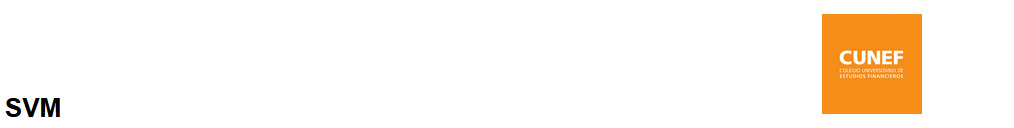

<table text-align="left"; style="width: 100%;"  >
<tbody>

<tr text-align="center">
<td width="19%" bgcolor="orange" ><FONT FONT SIZE="+1" COLOR="WHITE">Autores</FONT>&nbsp;</td>
<td width="73%" bgcolor="WHITE" align="center"><FONT FONT SIZE="+1" COLOR="ORANGE" >Correo</FONT>&nbsp;</td>
</tr>

<tr>
<td>&nbsp;</td>
<td> &nbsp;</td>
<td> &nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="5%"; bgcolor="orange" border = "4"><FONT FONT SIZE="+0.2" COLOR="WHITE">Valentina Díaz Torres</FONT>&nbsp;</td>
<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">Valentina.diaz@cunef.edu</FONT>&nbsp;</td>
</tr>

<tr>
<td width="5%"; bgcolor="orange"><FONT FONT SIZE="+0.2" COLOR="WHITE">Francisco del Val Yague</FONT>&nbsp;</td>

<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">Francisco.delval@cunef.edu</FONT>&nbsp;</td>
</tr>
<tr>
<td width="5%"; bgcolor="orange"><FONT FONT SIZE="+0.5" COLOR="WHITE">Alejandro García Girón</FONT>&nbsp;</td>

<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">A.garciagiron@cunef.edu</FONT>&nbsp;</td>
</tr>
    
</tbody>
</table>

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=134)
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
term
pymnt_plan
initial_list_status
application_type
hardship_flag
disbursement_method
debt_settlement_flag


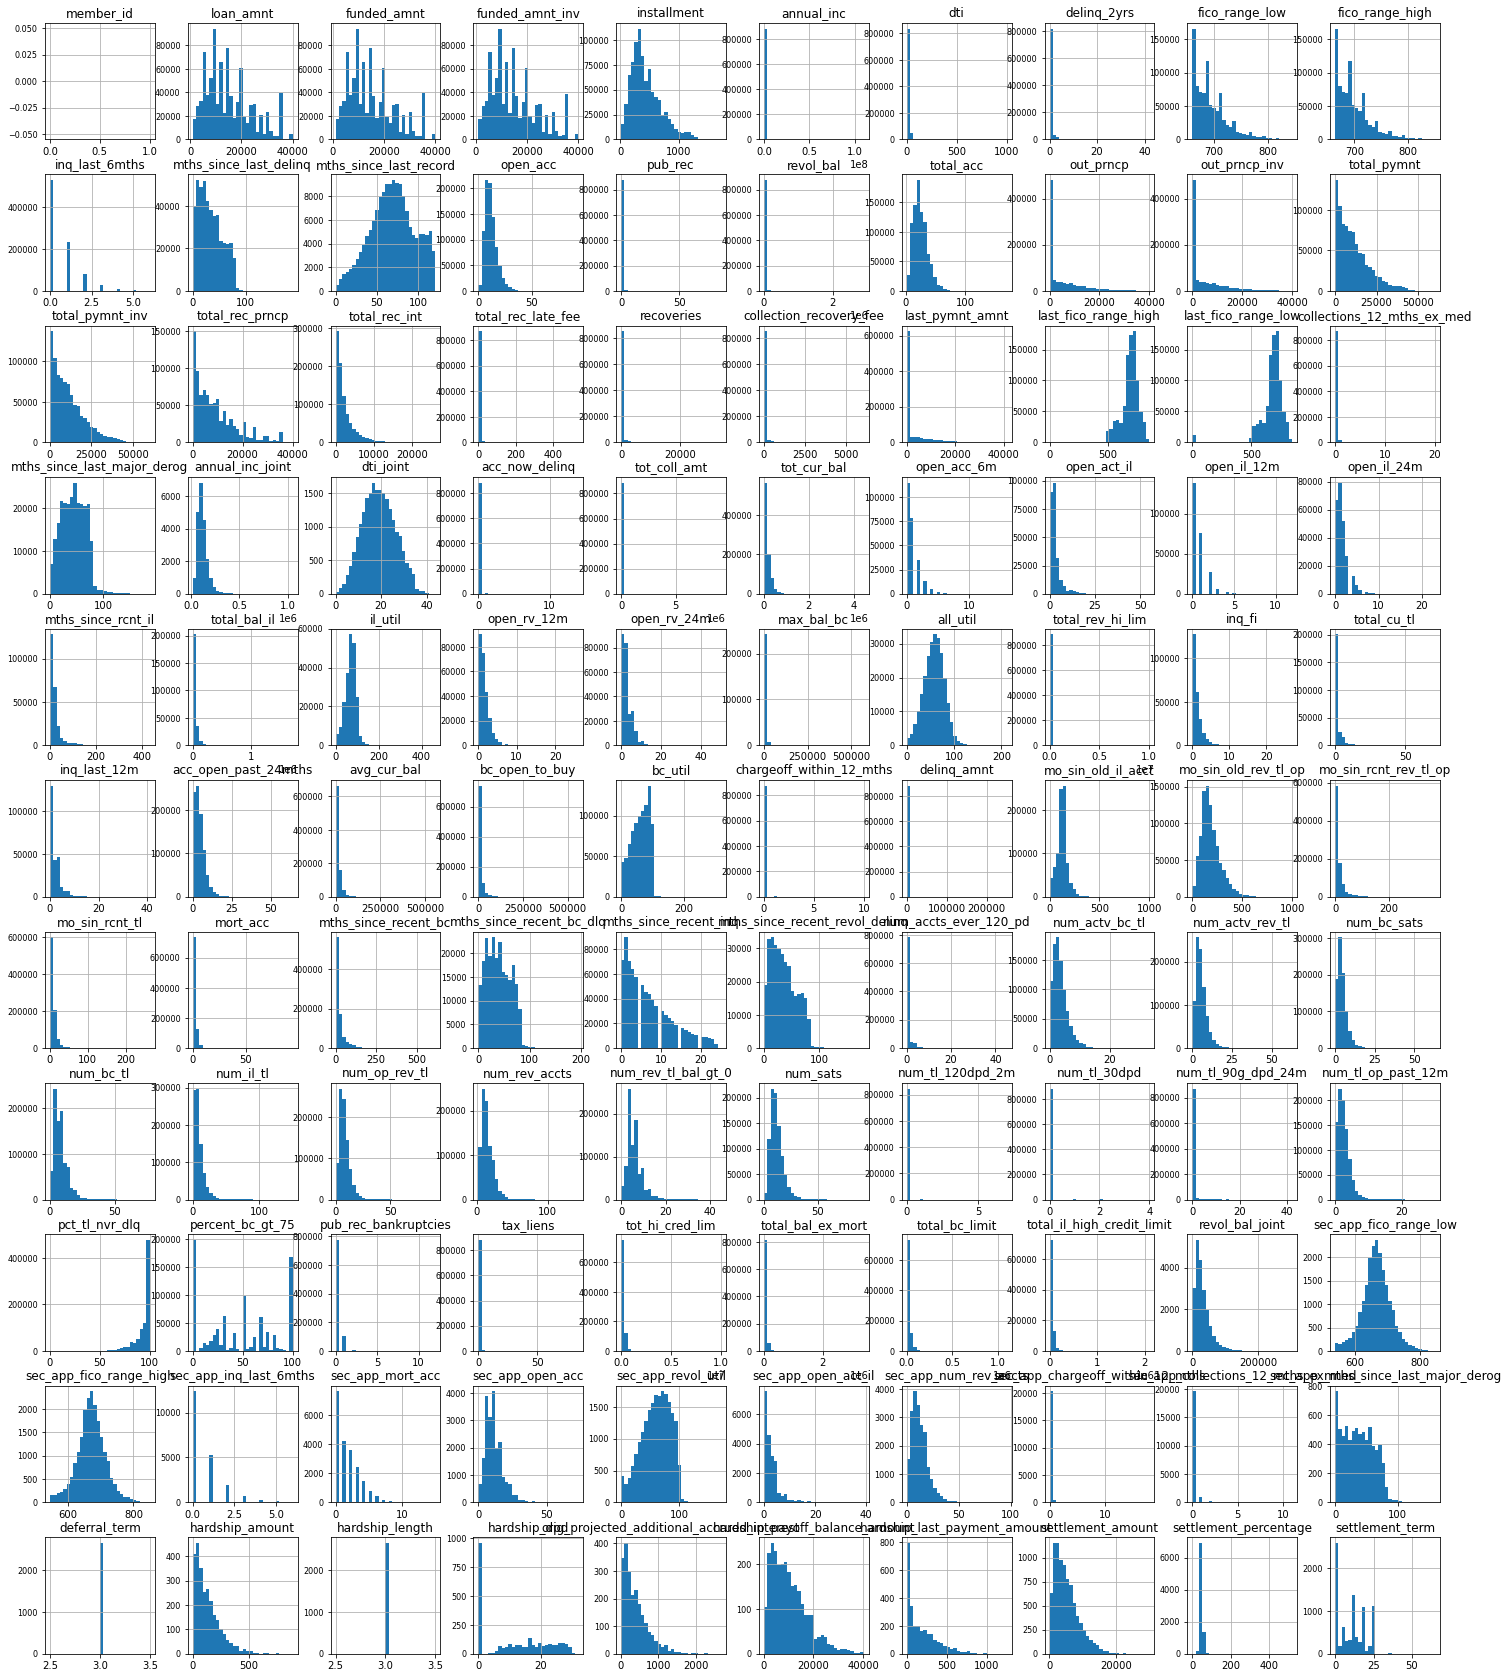

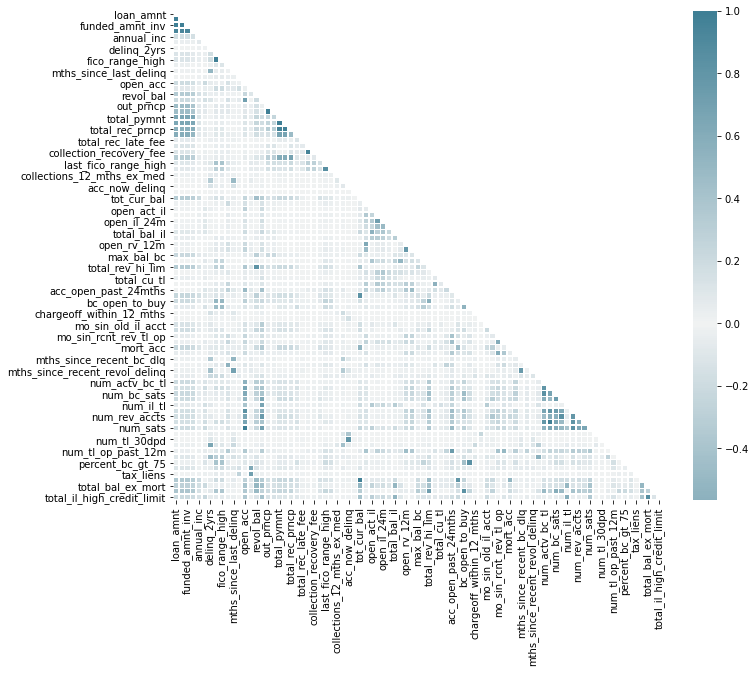

In [1]:
import sys
sys.path.append("../00_eda_ingeniera_variables")

from eda_ingenieria_de_variable import *

### SVM (Support Vector Machine )

**1. Definición**

Support Vector Machine  (SVM) es un modelo supervisado de aprendizaje con algoritmos asociados que analizan los datos y reconocen patrones, que se utiliza para la clasificación y el análisis de regresión en la Inteligencia de Negocios. El SVM básico toma un conjunto de datos de entrada y predice, para cada entrada dada, a cuál de las dos clases de salida pertenece, por lo que es un clasificador no-probabilístico lineal binario. Dado un conjunto de ejemplos de entrenamiento, cada uno marcado como perteneciente a una de dos categorías, un algoritmo de entrenamiento construye un modelo que asigna nuevos ejemplos en una categoría u otra.

**2.Librerias**

In [2]:
import pandas as pd
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC # Support Vector Machine 

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error,accuracy_score, plot_confusion_matrix, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# gráficos
import matplotlib.pyplot as plt 


# guardar modelo
import pickle
import random
random.seed(1984)

**Training - Test**

In [3]:
X = data.drop(['loan_status_Paga'], axis = 1)
Y = data['loan_status_Paga']

In [4]:
# Usamos la función train_test_split de SkLearn para dividir nuestro conjunto de datos en dos grupos, el más grande es entrenar
# modelo y el 20%  para predecir.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) # Porcentaje del grupo de prueba.

**4. Modelo SVM**

In [5]:
sv = SVC(kernel = 'linear', max_iter = 500)

 #ajustamos el modelo al conjunto de entradasX y salidas Y
sv.fit(X_train,Y_train)

C:\Users\aleja\anaconda3\envs\lendingClub_env\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=500)

Una vez recopilado nuestro modelo, le ordenamos que clasifique nuestro conjunto de entradas X mediante el método `predict(X)`. 

In [6]:

# Predict
pred = sv.predict(X_test)

#imprimimos el resultado para ver si es correcta (0 significa denegar, 1 aceptar)
print(pred)

[1 1 1 ... 1 1 1]


Utilizamos `accuracy_score()` para que devuelva la precisión medoa de las predicciones, y confirma lo bueno o no que es nuestro modelo.

In [7]:
# Precisión
accuracy_score(Y_test, pred)

# comparamos el la precision con el modelo base. ver!

0.7468168197405857

#### Matrices de confusión

In [8]:
confusion_matrix(Y_test, pred)

array([[    6, 23296],
       [  108, 69029]], dtype=int64)

**Matriz de confusión**

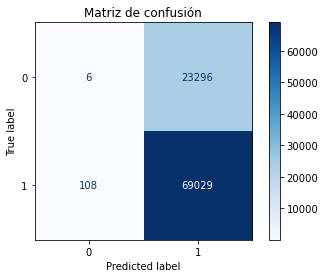

In [9]:
disp = plot_confusion_matrix(sv, X_test, Y_test,
                                 #display_labels= Y,
                                 cmap=plt.cm.Blues);
disp.ax_.set_title('Matriz de confusión');

**Matriz de confusión Normalizada**

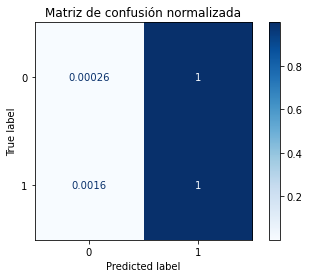

In [10]:
disp = plot_confusion_matrix(sv, X_test, Y_test,
                                 #display_labels= Y,
                                 cmap=plt.cm.Blues,
                                 normalize= 'true');
disp.ax_.set_title('Matriz de confusión normalizada');

**CURVA ROC**

In [20]:
logit_roc_auc = roc_auc_score(Y_test, sv.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, sv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM')
plt.show()

AttributeError: predict_proba is not available when  probability=False

**ESTADISTICAS DEL MODELO**

In [11]:
print(classification_report(Y_test, pred))
#print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.05      0.00      0.00     23302
           1       0.75      1.00      0.86     69137

    accuracy                           0.75     92439
   macro avg       0.40      0.50      0.43     92439
weighted avg       0.57      0.75      0.64     92439




Podemos observar nuevamente que este modelo tiene precisión para detectar personas que pagan, por lo que tiene una buena puntuación para este tipo de personas. Pero, la puntuación y la precisión para detectar a los que no pagan es bastante mala.

**GUARDADO DEL MODELOS**


In [12]:
model = sv
filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))